# Testing space for SWC plotting function

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [12]:
swc_file = 'cell1'
segs = pd.read_csv('../MorphoFiles/{x}.swc'.format(x=swc_file),comment='#',sep=' ', 
    names=['id','type','x','y','z','r','pid'])

In [13]:
segs = segs.merge(segs,left_on='id',right_on='pid',suffixes=[None, '_p'])
segs.columns

Index(['id', 'type', 'x', 'y', 'z', 'r', 'pid', 'id_p', 'type_p', 'x_p', 'y_p',
       'z_p', 'r_p', 'pid_p'],
      dtype='object')

[[-1.0000000e-01 -1.2246468e-17]
 [ 1.0000000e-01  0.0000000e+00]
 [ 1.0000000e-01 -1.0000000e+00]
 [-1.0000000e-01 -1.0000000e+00]]


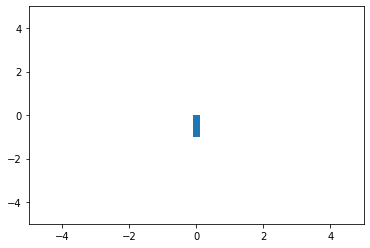

In [14]:
patches = []

def seg2coords(s_x,s_y,e_x,e_y,s_r,e_r):
    # s_ prefix for start seg
    # e_ prefix for end seg
    # x is x-coord, y is y-coord, r is radius

    seg_ang = np.angle((e_x-s_x)+(e_y-s_y)*1j) 
    pt11x = s_x+s_r*np.cos(seg_ang-(np.pi/2))
    pt11y = s_y+s_r*np.sin(seg_ang-(np.pi/2))
    
    pt12x = s_x+s_r*np.cos(seg_ang+(np.pi/2))
    pt12y = s_y+s_r*np.sin(seg_ang+(np.pi/2))

    pt21x = e_x+e_r*np.cos(seg_ang-(np.pi/2))
    pt21y = e_y+e_r*np.sin(seg_ang-(np.pi/2))
    
    pt22x = e_x+e_r*np.cos(seg_ang+(np.pi/2))
    pt22y = e_y+e_r*np.sin(seg_ang+(np.pi/2))

    coords = [[pt11x, pt11y], [pt12x, pt12y], [pt22x, pt22y], [pt21x, pt21y]]

    return np.array(coords)

test = seg2coords(0,0,0,-1,0.1,0.1)
print(test)
pgon = Polygon(test,True)
patches.append(pgon)

p = PatchCollection(patches)

fig, ax = plt.subplots()
ax.add_collection(p)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

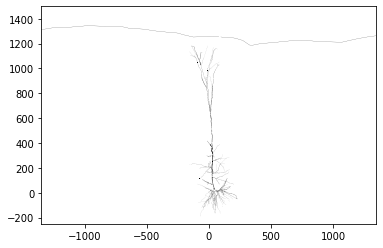

<Figure size 432x288 with 0 Axes>

In [15]:
patches = []
for idx, curr_row in segs.iterrows():
    curr_poly = Polygon(seg2coords(curr_row['x'],curr_row['y'], 
        curr_row['x_p'],curr_row['y_p'],curr_row['r'],curr_row['r_p']),True)
    patches.append(curr_poly)

p = PatchCollection(patches)
p.set_facecolor('k')
fig, ax = plt.subplots()
ax.add_collection(p)
ax.axis('equal')
plt.xlim(-300, 300)
plt.ylim(-250, 1500)
plt.show()
plt.savefig('../Figures/{x}.svg'.format(x=swc_file))
